<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


<AxesSubplot:xlabel='MEDV'>

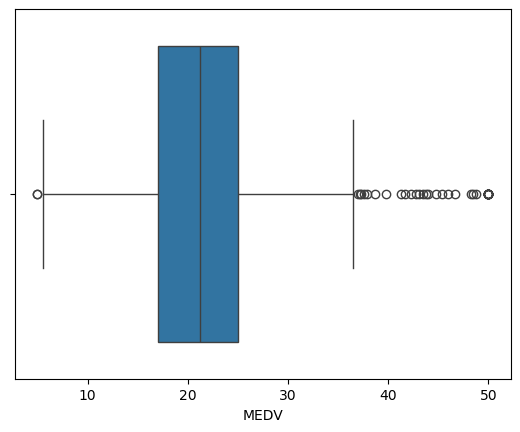

In [5]:
# "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(data=boston_df,x='MEDV')

<AxesSubplot:xlabel='CHAS', ylabel='count'>

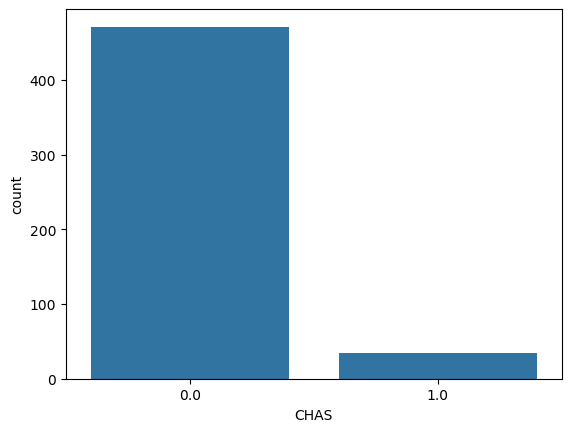

In [6]:
# Provide a  bar plot for the Charles river variable
sns.countplot(data=boston_df,x='CHAS')

<AxesSubplot:xlabel='Age_Group', ylabel='MEDV'>

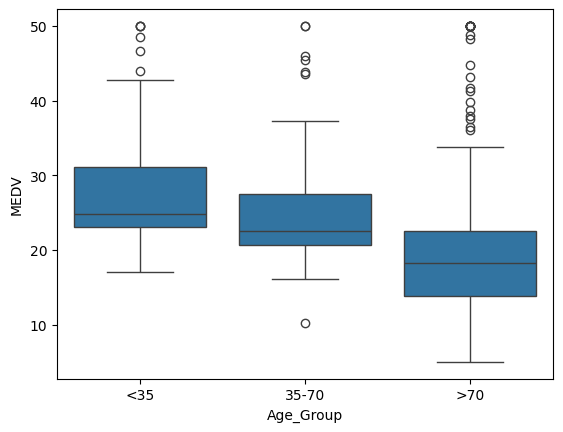

In [7]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
bins = [0, 35, 70, float('inf')]

# Define the labels for the age groups
labels = ['<35', '35-70', '>70']

# Create a new column 'Age_Group' based on the age groups
boston_df['Age_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)
sns.boxplot(data=boston_df,x='Age_Group',y='MEDV')

            

<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

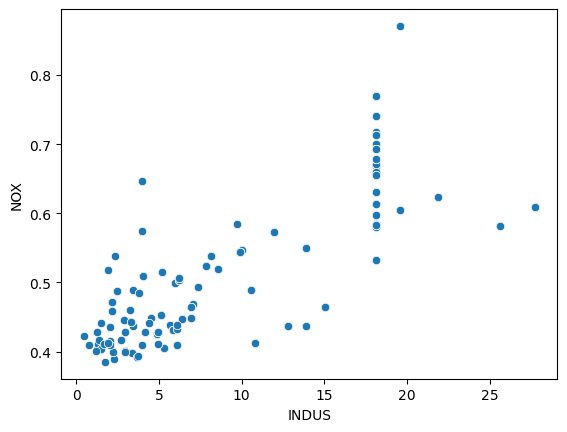

In [8]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
sns.scatterplot(x='INDUS',y='NOX',data=boston_df)
# POSITIVE CORRELATION WAS SEEN

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

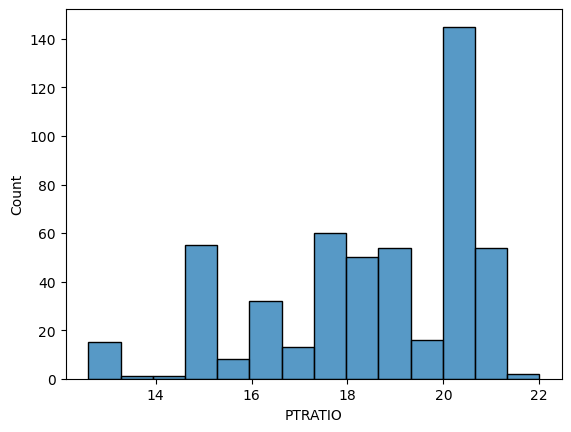

In [9]:

# Create a histogram for the pupil to teacher ratio variable
sns.histplot(data=boston_df, x='PTRATIO')


Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

In [10]:
# levene-test
scipy.stats.levene(boston_df[boston_df['CHAS']==1]['MEDV'],boston_df[boston_df['CHAS']==0]['MEDV'],center='median')
# there are different in variance

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

In [11]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)
#p value <0.05 indicate there are no significant difference in the median price of houses bounded by the charles river

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

In [12]:
boston_df.to_csv('boston.csv',index=True)

<class 'FileNotFoundError'>: [Errno 44] No such file or directory: 'boston.csv'

In [13]:
# Is there a difference in Median values 
# of houses (MEDV) for each proportion of owner 
# occupied units built prior to 1940 (AGE)? (ANOVA)

# null hypothesis=median has no significant difference across three age group
# alternative hypothesis=median has significant difference across three age group
scipy.stats.levene(boston_df[boston_df['Age_Group'] == '35-70']['MEDV'],
                   boston_df[boston_df['Age_Group'] == '>70']['MEDV'], 
                   boston_df[boston_df['Age_Group'] == '<35']['MEDV'], 
                   center='mean')

# since the pvalue >0.05 the variance has no significant difference between three group

there are no significant difference on the median price of houses between these three age_group of owner

<class 'SyntaxError'>: invalid syntax (<ipython-input-13-aa9fa11ae018>, line 14)

In [14]:
thirtyfive_lower=boston_df[boston_df['Age_Group'] == '35-70']['MEDV']
thirtyfive_seven=boston_df[boston_df['Age_Group'] == '>70']['MEDV']
seven_older=boston_df[boston_df['Age_Group'] == '<35']['MEDV']

In [15]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seven, seven_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))


# pvalue>0.05 , there are no significant difference on the median price of houses between these three age_group of owner

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's



PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

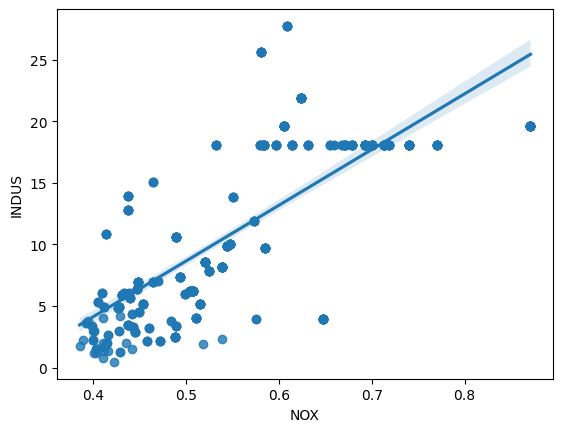

In [16]:
"""
pearson correlation
relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

null hypothesis : there are no relationship exist between nitric oxide concentration and proportion of non-retail business acres per town
alternative hypothesis: there are relationship exist between nitric oxide concentration and proportion of non-retail business acres per town

"""
ax = sns.regplot(x="NOX", y="INDUS", data=boston_df)
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

#pvalue<0.05, null hypothesis is rejected , there are significant 

In [18]:


'''
reject null hypothesis since the prob is less than 0.05, there are relationship exist between the weighted distance  
to the five Boston employment centres on the median value of owner occupied homes
'''

## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 31 Dec 2023   Prob (F-statistic):           1.21e-08
Time:                        00:12:56   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""